# 0.0. __INIT__

## 0.1. Imports

In [1]:
import pandas as pd
import plotly.express as px

## 0.2. Helper Functions

In [61]:
PXChart = px._chart_types

def numerical_description(numerical: pd.DataFrame) -> pd.DataFrame:
    description = numerical.describe().T
    description['range'] = description['max'] - description['min']
    description['skew'] = numerical.skew()
    description['kurtosis'] = numerical.kurtosis()

    return description

def plot_histogram(data: pd.DataFrame, column: str) -> None:
    fig = px.histogram(data, x=column)
    fig = fig.update_layout(
        title_text=f'{snake_to_text(column)} histogram',
        xaxis_title_text='Value',
        yaxis_title_text='Count')
    fig.show()

def plot_xy(data: pd.DataFrame, x_axis: str, y_axis: str, plot_type: PXChart) -> None:
    fig = plot_type(data, x=x_axis, y=y_axis)
    fig = fig.update_layout(
        title_text=f'{snake_to_text(y_axis)}',
        xaxis_title_text=snake_to_text(x_axis),
        yaxis_title_text='Value')
    fig.show()

def snake_to_text(string: str) -> str:
    return string.capitalize().replace("_", " ")

def get_region(data: pd.DataFrame, country: str) -> str:
    try:
        region = data[data["country_name"] == country]["regional_indicator"].values[0]
    except IndexError:
        region = "NOT_DEFINED"

    return region

## 0.3. Loading data

In [3]:
data_metrics = pd.read_excel("data/Data_2021.xls")
data_historic = pd.read_excel("data/Historic_data.xls")

# 1.0. DATA DESCRIPTION

In [4]:
df1_metrics = data_metrics.copy()
df1_historic = data_historic.copy()

## 1.1. Metrics description

In [75]:
df1_metrics.head()

country_name regional_indicator  ladder_score  logged_gdp_per_capita  \
0      Finland     Western Europe        7.8421              10.775202   
1      Denmark     Western Europe        7.6195              10.933176   
2  Switzerland     Western Europe        7.5715              11.117368   
3      Iceland     Western Europe        7.5539              10.877768   
4  Netherlands     Western Europe        7.4640              10.931812   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0        0.953603                72.000000                      0.949268   
1        0.954410                72.699753                      0.945639   
2        0.941742                74.400101                      0.918788   
3        0.982938                73.000000                      0.955123   
4        0.941601                72.400116                      0.913116   

   generosity  perceptions_of_corruption  
0   -0.097760                   0.185846  
1    0.030109                   0.178838  
2    0.024629                   0.291698  
3    0.160274                   0.672865  
4    0.175404                   0.337938

### 1.1.0. Renaming columns

In [76]:
df1_metrics.columns = [name.lower().replace(" ", "_") for name in df1_metrics.columns]

### 1.1.1. Data Dimensions

In [77]:
print(f'Number of rows: {df1_metrics.shape[0]}')
print(f'Number of columns: {df1_metrics.shape[1]}')

Number of rows: 149
Number of columns: 9


### 1.1.2. Data types

In [78]:
df1_metrics.dtypes

country_name                     object
regional_indicator               object
ladder_score                    float64
logged_gdp_per_capita           float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

### 1.1.3. Check NA

In [79]:
df1_metrics.isna().sum()

country_name                    0
regional_indicator              0
ladder_score                    0
logged_gdp_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

### 1.1.4. Fillout NA

In [80]:
# There is no NA
pass

### 1.1.5 Change types

In [81]:
# Not needed
pass

### 1.1.6. Descriptive Statistical

In [82]:
numerical = df1_metrics.select_dtypes(include=['int64', 'float64'])
categorical = df1_metrics.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

#### 1.1.6.1. Numerical attributes

In [83]:
numerical_description(numerical)

count       mean       std        min  \
ladder_score                  149.0   5.532832  1.073923   2.522900   
logged_gdp_per_capita         149.0   9.432209  1.158585   6.635322   
social_support                149.0   0.814726  0.114892   0.462596   
healthy_life_expectancy       149.0  64.992784  6.762071  48.478001   
freedom_to_make_life_choices  149.0   0.791572  0.113315   0.381749   
generosity                    149.0  -0.015149  0.150653  -0.288153   
perceptions_of_corruption     149.0   0.727477  0.179266   0.081959   

                                    25%        50%        75%        max  \
ladder_score                   4.851800   5.533500   6.255400   7.842100   
logged_gdp_per_capita          8.540956   9.568728  10.421198  11.646564   
social_support                 0.749777   0.831914   0.904702   0.982938   
healthy_life_expectancy       59.801552  66.603096  69.599998  76.952858   
freedom_to_make_life_choices   0.718051   0.804414   0.877263   0.970131   
generosity                    -0.126469  -0.036025   0.078830   0.541553   
perceptions_of_corruption      0.666607   0.780623   0.844619   0.939343   

                                  range      skew  kurtosis  
ladder_score                   5.319200 -0.104272 -0.368236  
logged_gdp_per_capita          5.011242 -0.352070 -0.815365  
social_support                 0.520342 -0.937962  0.398104  
healthy_life_expectancy       28.474857 -0.522006 -0.564196  
freedom_to_make_life_choices   0.588382 -0.756627  0.412602  
generosity                     0.829706  1.009203  1.631913  
perceptions_of_corruption      0.857385 -1.576883  2.248839

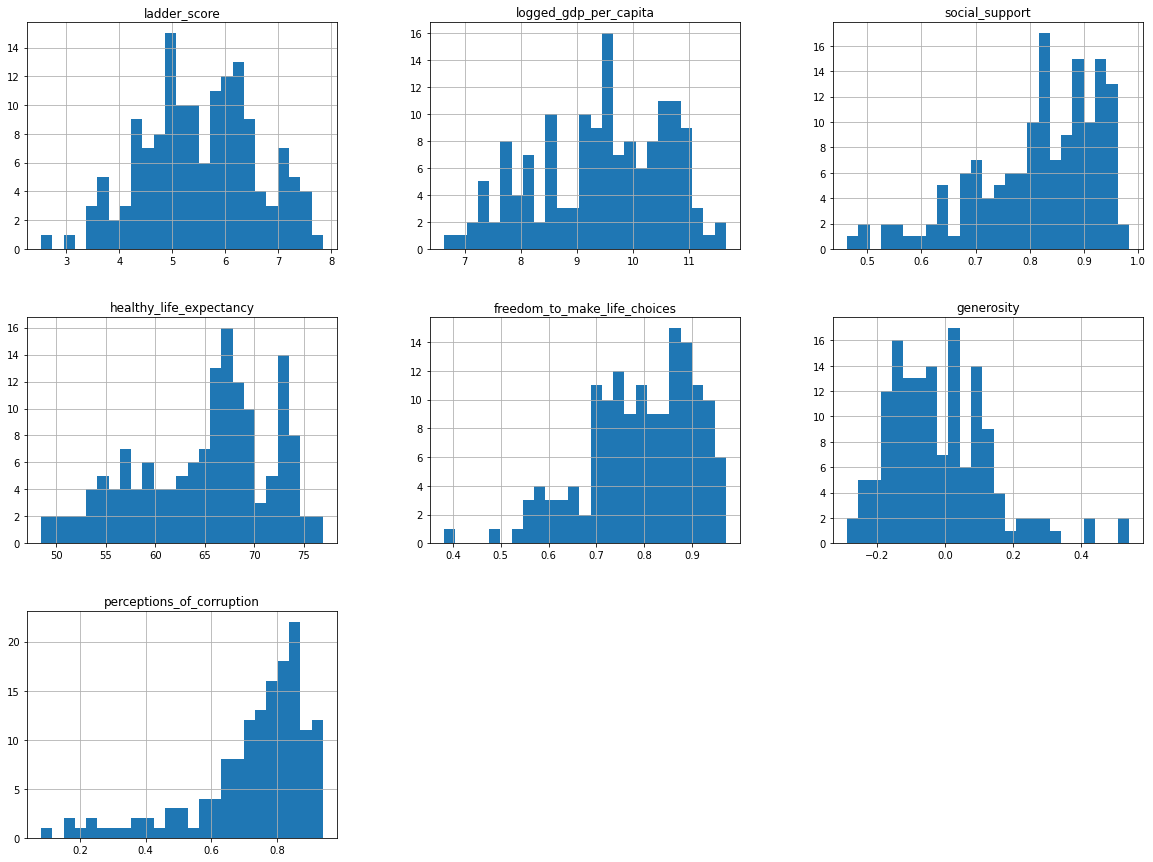

In [84]:
numerical.hist(bins=25, figsize=(20, 15));

#### 1.1.6.2. Categorical attributes

In [85]:
# Checking how many categories in each column
categorical.apply(lambda x: x.unique().shape[0])

country_name          149
regional_indicator     10
dtype: int64

In [86]:
# Bar plot for smallest granularity
for numerical_variable in numerical.columns:
    df_auxiliar = df1_metrics.sort_values(numerical_variable)
    plot_xy(df_auxiliar, x_axis="country_name", y_axis=numerical_variable, plot_type=px.bar)

In [87]:
for numerical_variable in numerical.columns:
    df_auxiliar = df1_metrics.sort_values(numerical_variable)
    plot_xy(df_auxiliar, x_axis="regional_indicator", y_axis=numerical_variable, plot_type=px.box)

## 1.2. Historic description

In [88]:
df1_historic.head()

country_name  year  life_ladder  log_gdp_per_capita  social_support  \
0  Afghanistan  2008     3.723590            7.370100        0.450662   
1  Afghanistan  2009     4.401778            7.539972        0.552308   
2  Afghanistan  2010     4.758381            7.646709        0.539075   
3  Afghanistan  2011     3.831719            7.619532        0.521104   
4  Afghanistan  2012     3.782938            7.705479        0.520637   

   healthy_life_expectancy_at_birth  freedom_to_make_life_choices  generosity  \
0                         50.799999                      0.718114    0.167640   
1                         51.200001                      0.678896    0.190099   
2                         51.599998                      0.600127    0.120590   
3                         51.919998                      0.495901    0.162427   
4                         52.240002                      0.530935    0.236032   

   perceptions_of_corruption  positive_affect  negative_affect  
0                   0.881686         0.517637         0.258195  
1                   0.850035         0.583926         0.237092  
2                   0.706766         0.618265         0.275324  
3                   0.731109         0.611387         0.267175  
4                   0.775620         0.710385         0.267919

### 1.2.0. Rename columns

In [89]:
df1_historic.columns = [name.lower().replace(" ", "_") for name in df1_historic.columns]

### 1.2.1. Data Dimensions

In [90]:
print(f'Number of rows: {df1_historic.shape[0]}')
print(f'Number of columns: {df1_historic.shape[1]}')

Number of rows: 1949
Number of columns: 11


### 1.2.2. Data types

In [91]:
df1_historic.dtypes

country_name                         object
year                                  int64
life_ladder                         float64
log_gdp_per_capita                  float64
social_support                      float64
healthy_life_expectancy_at_birth    float64
freedom_to_make_life_choices        float64
generosity                          float64
perceptions_of_corruption           float64
positive_affect                     float64
negative_affect                     float64
dtype: object

### 1.2.3. Check NA

In [92]:
df1_historic.isna().sum()

country_name                        0
year                                0
life_ladder                         0
log_gdp_per_capita                  0
social_support                      0
healthy_life_expectancy_at_birth    0
freedom_to_make_life_choices        0
generosity                          0
perceptions_of_corruption           0
positive_affect                     0
negative_affect                     0
dtype: int64

In [116]:
number_of_countries = df1_historic["country_name"].unique().shape[0]
df_auxiliar = df1_historic.groupby("year").count() / number_of_countries * 100
df_auxiliar.sort_values("year").reset_index()

year  country_name  life_ladder  log_gdp_per_capita  social_support  \
0   2005     16.265060    16.265060           16.265060       16.265060   
1   2006     53.614458    53.614458           53.614458       53.614458   
2   2007     61.445783    61.445783           61.445783       61.445783   
3   2008     66.265060    66.265060           66.265060       66.265060   
4   2009     68.674699    68.674699           68.674699       68.674699   
5   2010     74.698795    74.698795           74.698795       74.698795   
6   2011     87.951807    87.951807           87.951807       87.951807   
7   2012     85.542169    85.542169           85.542169       85.542169   
8   2013     82.530120    82.530120           82.530120       82.530120   
9   2014     87.349398    87.349398           87.349398       87.349398   
10  2015     86.144578    86.144578           86.144578       86.144578   
11  2016     85.542169    85.542169           85.542169       85.542169   
12  2017     88.554217    88.554217           88.554217       88.554217   
13  2018     85.542169    85.542169           85.542169       85.542169   
14  2019     86.746988    86.746988           86.746988       86.746988   
15  2020     57.228916    57.228916           57.228916       57.228916   

    healthy_life_expectancy_at_birth  freedom_to_make_life_choices  \
0                          16.265060                     16.265060   
1                          53.614458                     53.614458   
2                          61.445783                     61.445783   
3                          66.265060                     66.265060   
4                          68.674699                     68.674699   
5                          74.698795                     74.698795   
6                          87.951807                     87.951807   
7                          85.542169                     85.542169   
8                          82.530120                     82.530120   
9                          87.349398                     87.349398   
10                         86.144578                     86.144578   
11                         85.542169                     85.542169   
12                         88.554217                     88.554217   
13                         85.542169                     85.542169   
14                         86.746988                     86.746988   
15                         57.228916                     57.228916   

    generosity  perceptions_of_corruption  positive_affect  negative_affect  
0    16.265060                  16.265060        16.265060        16.265060  
1    53.614458                  53.614458        53.614458        53.614458  
2    61.445783                  61.445783        61.445783        61.445783  
3    66.265060                  66.265060        66.265060        66.265060  
4    68.674699                  68.674699        68.674699        68.674699  
5    74.698795                  74.698795        74.698795        74.698795  
6    87.951807                  87.951807        87.951807        87.951807  
7    85.542169                  85.542169        85.542169        85.542169  
8    82.530120                  82.530120        82.530120        82.530120  
9    87.349398                  87.349398        87.349398        87.349398  
10   86.144578                  86.144578        86.144578        86.144578  
11   85.542169                  85.542169        85.542169        85.542169  
12   88.554217                  88.554217        88.554217        88.554217  
13   85.542169                  85.542169        85.542169        85.542169  
14   86.746988                  86.746988        86.746988        86.746988  
15   57.228916                  57.228916        57.228916        57.228916

In [94]:
number_of_years = df1_historic["year"].unique().shape[0]
df_auxiliar = df1_historic.groupby("country_name").count() / number_of_years * 100
df_auxiliar.sort_values("positive_affect").reset_index()

country_name   year  life_ladder  log_gdp_per_capita  social_support  \
0            Cuba   6.25         6.25                6.25            6.25   
1        Maldives   6.25         6.25                6.25            6.25   
2          Guyana   6.25         6.25                6.25            6.25   
3            Oman   6.25         6.25                6.25            6.25   
4        Suriname   6.25         6.25                6.25            6.25   
..            ...    ...          ...                 ...             ...   
161      Cambodia  93.75        93.75               93.75           93.75   
162        Russia  93.75        93.75               93.75           93.75   
163  Saudi Arabia  93.75        93.75               93.75           93.75   
164         Egypt  93.75        93.75               93.75           93.75   
165      Zimbabwe  93.75        93.75               93.75           93.75   

     healthy_life_expectancy_at_birth  freedom_to_make_life_choices  \
0                                6.25                          6.25   
1                                6.25                          6.25   
2                                6.25                          6.25   
3                                6.25                          6.25   
4                                6.25                          6.25   
..                                ...                           ...   
161                             93.75                         93.75   
162                             93.75                         93.75   
163                             93.75                         93.75   
164                             93.75                         93.75   
165                             93.75                         93.75   

     generosity  perceptions_of_corruption  positive_affect  negative_affect  
0          6.25                       6.25             6.25             6.25  
1          6.25                       6.25             6.25             6.25  
2          6.25                       6.25             6.25             6.25  
3          6.25                       6.25             6.25             6.25  
4          6.25                       6.25             6.25             6.25  
..          ...                        ...              ...              ...  
161       93.75                      93.75            93.75            93.75  
162       93.75                      93.75            93.75            93.75  
163       93.75                      93.75            93.75            93.75  
164       93.75                      93.75            93.75            93.75  
165       93.75                      93.75            93.75            93.75  

[166 rows x 11 columns]

### 1.2.4. Fillout NA

In [101]:
# For simplicity and considering that skew observed in section 1.2.6.1. e 1.2.6.2.
# # -> Using median
not_filled_df = df1_historic.copy()
for column in df1_historic.columns[1:]:
    df1_historic[column].fillna(df1_historic[column].median(), inplace=True)

In [102]:
df1_historic.isna().sum()

country_name                        0
year                                0
life_ladder                         0
log_gdp_per_capita                  0
social_support                      0
healthy_life_expectancy_at_birth    0
freedom_to_make_life_choices        0
generosity                          0
perceptions_of_corruption           0
positive_affect                     0
negative_affect                     0
dtype: int64

### 1.2.5 Change types

In [103]:
# Not needed
pass

### 1.2.6. Descriptive Statistical

In [104]:
numerical = df1_historic.select_dtypes(include=['int64', 'float64'])
categorical = df1_historic.select_dtypes(exclude=['float64', 'datetime64[ns]'])  # Excluded int64

#### 1.2.6.1. Numerical attributes

In [105]:
numerical_description(numerical)

count         mean       std          min  \
year                              1949.0  2013.216008  4.166828  2005.000000   
life_ladder                       1949.0     5.466707  1.115717     2.375092   
log_gdp_per_capita                1949.0     9.370155  1.143444     6.635322   
social_support                    1949.0     0.812704  0.118099     0.290184   
healthy_life_expectancy_at_birth  1949.0    63.411317  7.409737    32.299999   
freedom_to_make_life_choices      1949.0     0.742910  0.140957     0.257534   
generosity                        1949.0    -0.001056  0.158561    -0.335040   
perceptions_of_corruption         1949.0     0.750233  0.181891     0.035198   
positive_affect                   1949.0     0.710138  0.106508     0.321690   
negative_affect                   1949.0     0.268466  0.084830     0.082737   

                                          25%          50%          75%  \
year                              2010.000000  2013.000000  2017.000000   
life_ladder                          4.640079     5.386025     6.283498   
log_gdp_per_capita                   8.478379     9.460323    10.335316   
social_support                       0.750738     0.835167     0.904971   
healthy_life_expectancy_at_birth    58.900002    65.199997    68.400002   
freedom_to_make_life_choices         0.649316     0.763476     0.853534   
generosity                          -0.106459    -0.025393     0.084833   
perceptions_of_corruption            0.698808     0.802428     0.867640   
positive_affect                      0.627351     0.722391     0.797785   
negative_affect                      0.206641     0.258117     0.319231   

                                          max      range      skew  kurtosis  
year                              2020.000000  15.000000 -0.128238 -1.077674  
life_ladder                          8.018934   5.643842  0.068491 -0.688600  
log_gdp_per_capita                  11.648169   5.012846 -0.315749 -0.821982  
social_support                       0.987343   0.697159 -1.117841  1.216308  
healthy_life_expectancy_at_birth    77.099998  44.799999 -0.773842  0.043662  
freedom_to_make_life_choices         0.985178   0.727644 -0.635143 -0.074113  
generosity                           0.698099   1.033139  0.846856  1.040651  
perceptions_of_corruption            0.983276   0.948078 -1.578747  2.185235  
positive_affect                      0.943621   0.621931 -0.369953 -0.555219  
negative_affect                      0.704590   0.621853  0.743382  0.899204

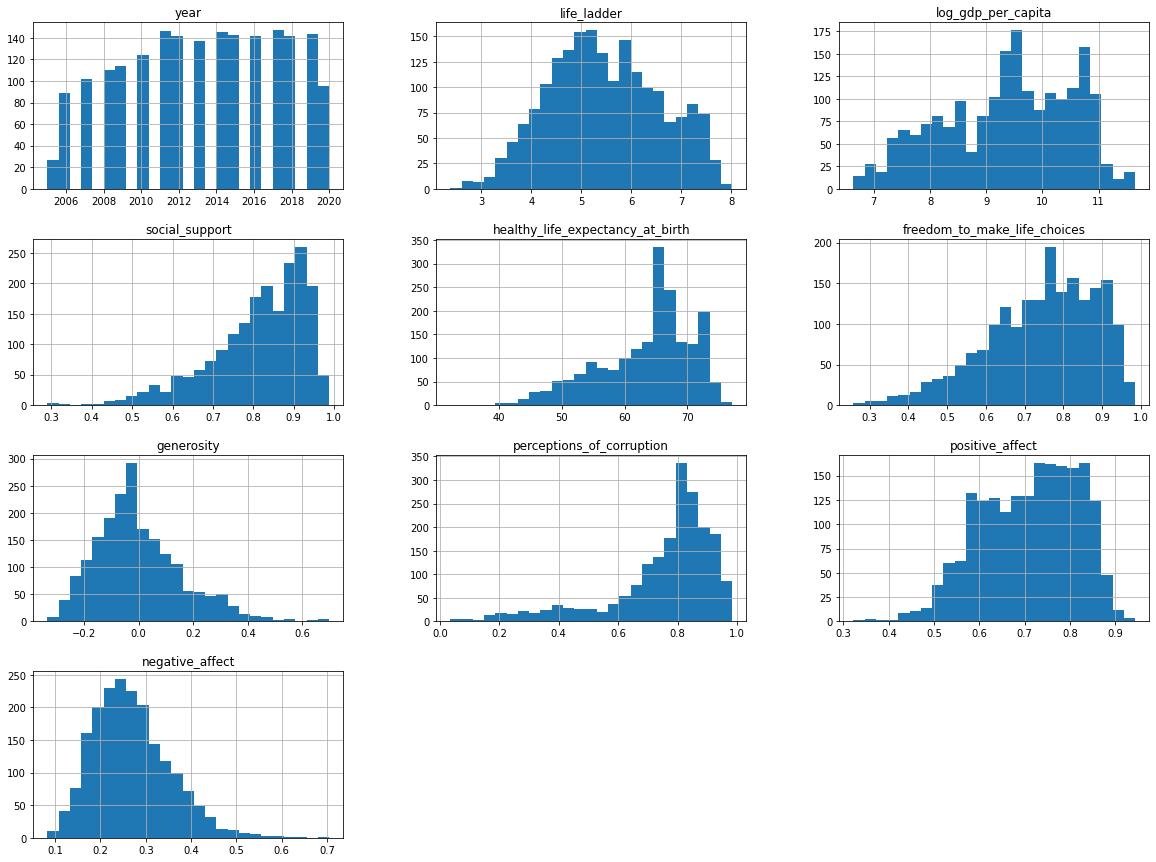

In [106]:
numerical.hist(bins=25, figsize=(20, 15));

#### 1.2.6.2. Categorical attributes

In [107]:
# Checking how many categories in each column
categorical.apply(lambda x: x.unique().shape[0])

country_name    166
year             16
dtype: int64

In [108]:
# Bar plot for smallest granularity
for numerical_variable in numerical.columns[1:]:  # To exclude "year" column
    df_auxiliar = df1_historic.sort_values(numerical_variable)
    plot_xy(df_auxiliar, x_axis="country_name", y_axis=numerical_variable, plot_type=px.box)

# 2.0. FEATURE ENGENEERING

In [142]:
df2_metrics = df1_metrics.copy()
df2_historic = df1_historic.copy()

In [143]:
df2_historic.sort_values("year").year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020], dtype=int64)

## 2.1. Questions

1. O propósito é demonstrar para a alta cúpula a estimativa da felicidade média de um país através de métricas quantificáveis de desenvolvimento humano.

2. É possível identificar a região do mundo em que um país se encontra através da relação entre as métricas e o índice de felicidade obtido?

- Independente da afirmação - ou não - da pergunta, explique e justifique sua resposta;
- Se a resposta for negativa, existe alguma outra forma de identificar a região do mundo de um país?

3. Que tal pensar fora da caixa dos dados disponíveis? A pandemia causou algum impacto nos índices obtidos da felicidade mundial?


## 2.3. Featuring engineering

For simplicity, I'm taking the feature "Positive affect" as the response variable. This feature reflect the closest definition of happiness. So, there is no need to derivate other feature.

But, to answer the second question, we will need to use the "Regional indicator" feature.

In [144]:
regional_column = list()
for ii in range(len(df2_historic)):
    country = df2_historic["country_name"][ii]
    region = get_region(df2_metrics, country)
    
    regional_column.append(region)

df2_historic["regional_indicator"] = regional_column
df2_historic.head()

country_name  year  life_ladder  log_gdp_per_capita  social_support  \
0  Afghanistan  2008     3.723590            7.370100        0.450662   
1  Afghanistan  2009     4.401778            7.539972        0.552308   
2  Afghanistan  2010     4.758381            7.646709        0.539075   
3  Afghanistan  2011     3.831719            7.619532        0.521104   
4  Afghanistan  2012     3.782938            7.705479        0.520637   

   healthy_life_expectancy_at_birth  freedom_to_make_life_choices  generosity  \
0                         50.799999                      0.718114    0.167640   
1                         51.200001                      0.678896    0.190099   
2                         51.599998                      0.600127    0.120590   
3                         51.919998                      0.495901    0.162427   
4                         52.240002                      0.530935    0.236032   

   perceptions_of_corruption  positive_affect  negative_affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

  regional_indicator  
0         South Asia  
1         South Asia  
2         South Asia  
3         South Asia  
4         South Asia

# 3.0. DATA FILTERING

In [198]:
df3 = df2_historic.copy()

## 3.1. Lines filtering

In [199]:
# It will not remove any pandemics year
df3 = df3[df3["regional_indicator"] != "NOT_DEFINED"]

## 3.2. Columns filtering

In [200]:
# Keeping all of the columns
pass

# 4.0. EXPLORATORY DATA ANALISYS (EDA)

In [201]:
df4 = df3.copy()

## 4.1. Univariate Analysis

### 4.1.1. Response Variable

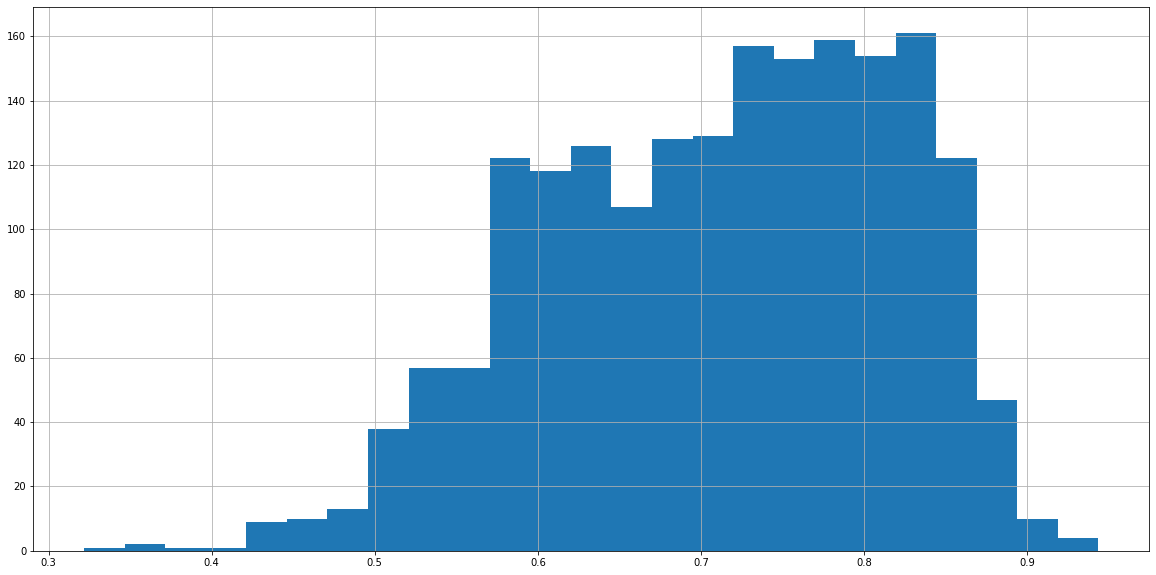

In [233]:
df4["positive_affect"].hist(bins=25, figsize=(20, 10));

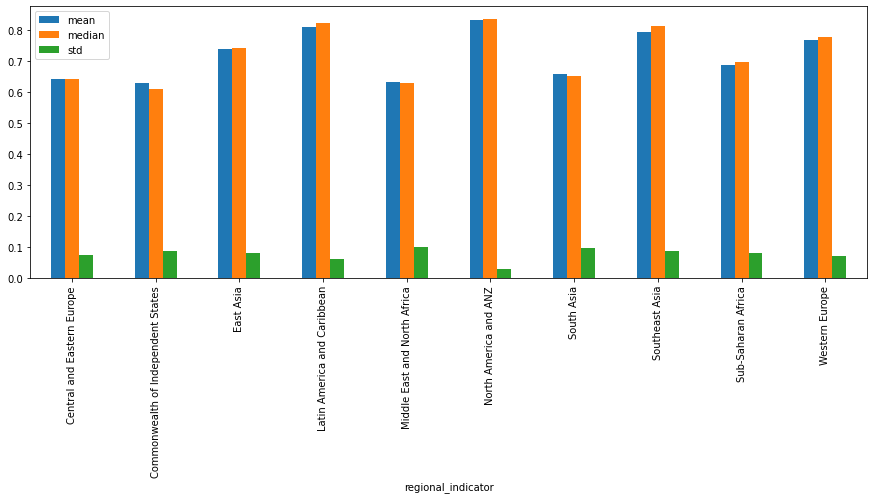

In [234]:
df4.groupby("regional_indicator")["positive_affect"].agg(
    ["mean", "median", "std"]
).plot(kind="bar", figsize=(15, 5));

### 4.1.2. Numerical Variables

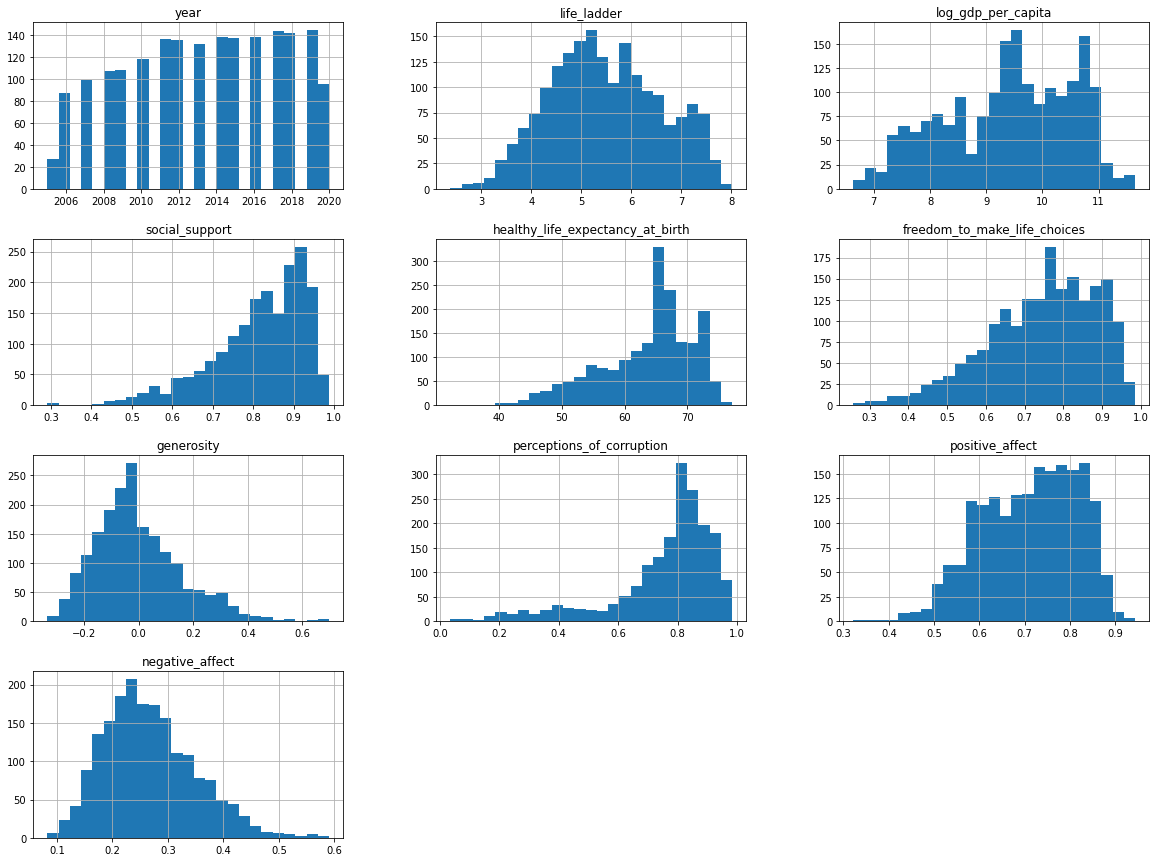

In [235]:
# The main point of seeing this again is to keep in mind what features
# may need a transformation in their distribution for better ML results
df4.hist(bins=25, figsize=(20, 15));

### 4.1.3. Categorical Variables

In [204]:
# Ignoring
pass

## 4.2. Bivariate Analysis

### 4.2.1. Correlation checking

In [236]:
variables = [
    'life_ladder', 'log_gdp_per_capita',
    'social_support', 'healthy_life_expectancy_at_birth',
    'freedom_to_make_life_choices', 'generosity',
    'perceptions_of_corruption', 'negative_affect'
]
for variable in variables:
    fig = px.scatter(
        df4, x=variable, y="positive_affect",
        color="regional_indicator", #trendline="ols",
        title=snake_to_text(variable))
    fig.show()

### 4.2.2. Time evolution

In [237]:
df_sorted = df4.sort_values("year").reset_index()
df_sorted = df_sorted.groupby(["year", "regional_indicator"]).mean().reset_index()
fig = px.line(df_sorted, x='year', y='positive_affect', color='regional_indicator')
fig.show()

## 4.3. Embedding space

In [249]:
df4_3 = df4.copy()
df4_3 = df4_3[df4_3.columns[2:-1]]

In [250]:
from sklearn import preprocessing as pp

In [251]:
mm = pp.MinMaxScaler()

for variable in df4_3.columns:
    print(variable)
    df4_3[variable] = mm.fit_transform(df4_3[[variable]])

life_ladder
log_gdp_per_capita
social_support
healthy_life_expectancy_at_birth
freedom_to_make_life_choices
generosity
perceptions_of_corruption
positive_affect
negative_affect


In [252]:
from sklearn import decomposition as dd

### 4.3.1. PCA

In [254]:
X = df4_3.copy()
pca = dd.PCA(n_components=X.shape[1])

principal_components = pca.fit_transform(X)

# plot explained variable
features = range(pca.n_components_)

# pca component
df_pca = pd.DataFrame( principal_components )

In [262]:
# px.bar( features, pca.explained_variance_ratio_, color='black' )
evr_data = [{"Value": evr} for evr in pca.explained_variance_ratio_]
evr_data = pd.DataFrame(evr_data)
px.bar(evr_data)

In [264]:
px.scatter(df_pca)

In [270]:
from sklearn.manifold import TSNE

In [271]:
reducer = TSNE( random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_umap = pd.DataFrame()
df_umap['embedding_x'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

# plot UMAP
px.scatter(df_umap, x='embedding_x', y='embedding_y')

c:\users\jeova\repos\desafio_bornlogic\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\users\jeova\repos\desafio_bornlogic\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



### **H1.** Lojas com maior sortimento deveriam vender mais.
**FALSA** Lojas com MAIOR SORTIMENTO vendem MENOS

### **H2.** Lojas com competidores mais perto deveriam vender mais.
**VERDADEIRA**

### **H3.** Lojas com competidores há mais tempo deveriam vender mais.
**FALSA** Lojas com competidores há MAIS TEMPO vendem MENOS

### **H4.** Lojas com promoções ativas por mais tempo deveriam vender mais.
**FALSA** Lojas com promoções ativas por MAIS TEMPO vendem MENOS depois de um certo período de tempo

### 4.2.1. Hypothesis summary

## 4.3. Multivariate Analysis

### 4.3.1 Numerical Attributes

### 4.3.2 Categorical Attributes

# 5.0. DATA PREPARATION

## 5.1. Normalization
Because it was not possible to identify any normal distribution in section 4.1.2., there will be no data normalization.

## 5.2. Rescaling

## 5.3. Transformation

### 5.3.1. Encoding

### 5.3.2. Response variable transformation

### 5.3.3. Nature transformation

# 6.0. FEATURE SELECTION

## 6.1. Split dataframe into training and test datasets

## 6.2. Feature Selector

### 6.2.1. Best Features

## 6.3. Feature Selection

# 7.0. MACHINE LEARNING MODELLING

## 7.1. Baseline Model

## 7.2. Linear Regression Model

### 7.2.1. Linear Regression Model - Cross Validation

## 7.3. Linear Regression Regularized Model - Lasso

### 7.3.1. Linear Regression Regularized Model - Cross Validation

## 7.4. Random Forest Regressor

### 7.4.1. Random Forest Regressor - Cross Validation

## 7.5. XGBoost Regressor

### 7.5.1. XGBoost Regressor - Cross Validation

## 7.6. Model comparison

### 7.6.1. Single Performance

### 7.6.2. Real Performance - Cross Validation

# 8.0. HYPERPARAMETER FINE TUNING


## 8.1. Random Search

## 8.2. Final Model

# 9.0. ERROR TRANSLATION AND INTERPRETATION


## 9.1. Business Performance

## 9.2. Total Performance

## 9.3. Machine Learning Performance

# 10.0. DEPLOY MODEL TO PRODUCTION


## 10.1. Class Definition

## 10.2. API Handler

## 10.3. API Tester

# Visualization ideas

In [172]:
# Globe
df_mean = df2_metrics.groupby(
    ['country_name']).mean(['ladder_score']).reset_index()

fig = px.choropleth(
    df_mean, locations='country_name', locationmode="country names", 
    color='ladder_score', projection='orthographic', 
    color_continuous_scale=px.colors.sequential.Viridis,
    range_color=[0, 10],
    title="Positive affect index", 
)

fig.show()

In [188]:
variable = "generosity"

# df_mean = df2_historic.groupby(
#     ['year','country_name']).mean(
#     [variable]).reset_index()

df_sorted = df2_historic.sort_values("year").reset_index()
fig = px.choropleth(
    df_sorted, locations='country_name', locationmode="country names",
    color=variable, animation_frame='year',
    color_continuous_scale=px.colors.diverging.BrBG,
    range_color=[-1, 1],
    color_continuous_midpoint=0,
    title=f'{variable.capitalize()} time evolution'
)

fig.show()

In [209]:
variable = "positive_affect"

df_sorted = df2_historic.sort_values("year").reset_index()
fig = px.choropleth(
    df_sorted, locations='country_name', locationmode="country names",
    color=variable, animation_frame='year',
    color_continuous_scale=px.colors.sequential.Viridis,
    range_color=[0.4, 1],
    title=f'{variable.capitalize()} time evolution'
)

fig.show()